# Colbert vs Fallon Rating Analysis

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

nielson = pd.read_csv('../nielson/ratings.csv', parse_dates=['start_date', 'end_date'])
colbert_trump_mentions = pd.read_csv('../the-late-show-with-stephen-colbert/data/trump_mentions.csv',
                                     parse_dates=['air_date'])
fallon_trump_mentions = pd.read_csv('../the-tonight-show-starting-jimmy-fallon/data/trump_mentions.csv',
                                     parse_dates=['air_date'])

## Number of Viewers in Millions vs Number of Trump Mentions

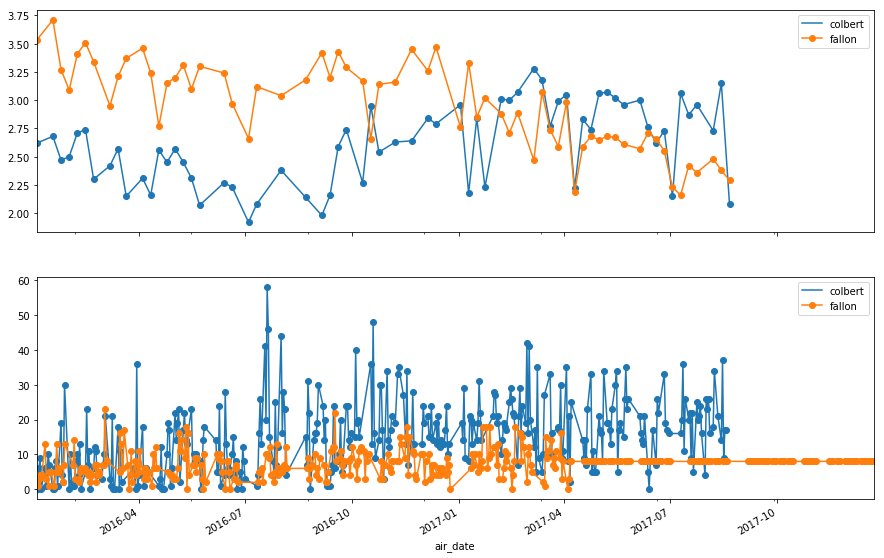

In [2]:
fig, axs = plt.subplots(2, sharex=True, figsize=(15,10))

nielson[nielson.show == "Late Show with Stephen Colbert"].set_index('start_date')["2016":].plot(y='viewers_week', ax=axs[0], marker='o', label='colbert')
nielson[nielson.show == "The Tonight Show Starring Jimmy Fallon"].set_index('start_date')["2016":].plot(y='viewers_week', ax=axs[0], marker='o', label='fallon')

colbert_trump_mentions.set_index('air_date')["2016":].plot(y='count', ax=axs[1], marker='o', label='colbert')
fallon_trump_mentions.set_index('air_date')["2016":].plot(y='count', ax=axs[1], marker='o', label='fallon')

## Average Viewers in Millions vs Trump Mentions by Month

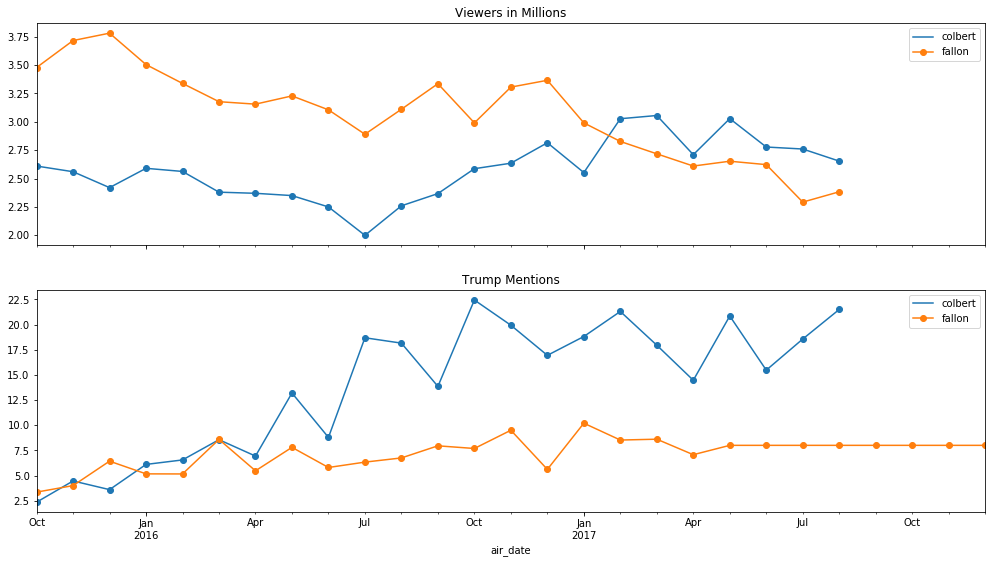

In [3]:
start_date = "2015-10-01"
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(17,9))
ax1.set_title('Viewers in Millions')
nielson[nielson.show == "Late Show with Stephen Colbert"].set_index('start_date')[start_date:].resample('M').mean().plot(y='viewers_week', ax=ax1, marker='o', label='colbert')
nielson[nielson.show == "The Tonight Show Starring Jimmy Fallon"].set_index('start_date')[start_date:].resample('M').mean().plot(y='viewers_week', ax=ax1, marker='o', label='fallon')
ax2.set_title('Trump Mentions')
colbert_trump_mentions.set_index('air_date')[start_date:].resample('M').mean().plot(y='count', ax=ax2, marker='o', label='colbert')
fallon_trump_mentions.set_index('air_date')[start_date:].resample('M').mean().plot(y='count', ax=ax2, marker='o', label='fallon')